In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("PreProcessed_WhatsappChat.csv")

In [3]:
dataset

,Unnamed: 0,Date,Time,Name,Chat
0,1,05/12/19,1:42 pm,Mabel Infoziant,Hi this is Mabel we just spoke
1,2,05/12/19,1:42 pm,Mabel Infoziant,What’s your full name
2,3,05/12/19,1:42 pm,AR❤,Ramisha Rani K
3,4,05/12/19,1:42 pm,Mabel Infoziant,Ok
4,5,05/12/19,1:42 pm,Mabel Infoziant,ramisharanik@gmail.com
5,6,05/12/19,1:43 pm,Mabel Infoziant,Your email Id?
6,7,05/12/19,1:43 pm,AR❤,Yes Mam
7,8,05/12/19,1:43 pm,Mabel Infoziant,I will send 2 abstracts for u to start working
8,9,05/12/19,1:43 pm,AR❤,Yeah mam
9,10,05/12/19,1:43 pm,Mabel Infoziant,Give me the list that u have too


In [7]:
dataset=dataset.drop('Unnamed: 0',axis=1)

In [8]:
def sentimentalAnalysis(dataset,colName):
    "Importing necessary package"
    import matplotlib.pyplot as plt
    import seaborn as sns
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    sia=SentimentIntensityAnalyzer()
    
    "Dropping null value"
    dataset.dropna(inplace=True)

    "Creating columns"
    dataset['Scores']=dataset[colName].apply(lambda commentText : sia.polarity_scores(commentText))
    dataset['Compound']=dataset['Scores'].apply(lambda score_dict : score_dict['compound'])
    dataset['Positive']  = dataset['Scores'].apply(lambda score_dict: score_dict['pos'])
    dataset['Negative']  = dataset['Scores'].apply(lambda score_dict: score_dict['neg'])
    dataset['Neutral']  = dataset['Scores'].apply(lambda score_dict: score_dict['neu'])

    "Creating final pos or neg using compound score"
    dataset['comp_score'] = dataset['Compound'].apply(lambda c:  'pos' if c>=0 else 'neg')

    "Checking how many pos and neg"
    posneg=pd.DataFrame(dataset['comp_score'].value_counts())

    return dataset,posneg
    

In [9]:
data,posneg_count = sentimentalAnalysis(dataset,colName='Chat')

In [10]:
data.head()

,Date,Time,Name,Chat,Scores,Compound,Positive,Negative,Neutral,comp_score
0,05/12/19,1:42 pm,Mabel Infoziant,Hi this is Mabel we just spoke,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,0.0,1.0,pos
1,05/12/19,1:42 pm,Mabel Infoziant,What’s your full name,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,0.0,1.0,pos
2,05/12/19,1:42 pm,AR❤,Ramisha Rani K,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,0.0,1.0,pos
3,05/12/19,1:42 pm,Mabel Infoziant,Ok,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.296,1.0,0.0,0.0,pos
4,05/12/19,1:42 pm,Mabel Infoziant,ramisharanik@gmail.com,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,0.0,1.0,pos


In [11]:
posneg_count

,count
comp_score,
pos,48
neg,2


# Flirt Encounters

In [25]:

# Count the number of messages sent by each sender
message_counts = dataset['Name'].value_counts()

# Determine the more and less talkative person
most_talkative = message_counts.idxmax()
least_talkative = message_counts.idxmin()

# Define a list of flirtatious keywords/phrases
flirtatious_keywords = ["miss", "thinking of you",
                        "on my mind", "sweet", "love", "dear", "babe", ";)", "<3","hot","think" 
                        "beautiful", "handsome"]

# Function to check if a message is flirtatious
def is_flirtatious(message):
    for keyword in flirtatious_keywords:
        if keyword in message.lower():
            return True
    return False

# Apply the function to create a flirtatious column
dataset['Flirtatious'] = dataset['Chat'].apply(is_flirtatious)

# Count flirtatious messages by sender
flirtatious_counts = dataset[dataset['Flirtatious']].groupby('Name').size()

# Get the unique senders
senders = dataset['Name'].unique()

# Output the results for talkative
print(f"Most talkative: {most_talkative} with {message_counts[most_talkative]} messages")
print(f"Least talkative: {least_talkative} with {message_counts[least_talkative]} messages")

# Output the flirt status for each sender
for sender in senders:
    flirt_status = "Yes" if sender in flirtatious_counts.index else "No"
    print(f"Flirt by {sender}: {flirt_status}")


Most talkative:  AR❤ with 27 messages
Least talkative:  Mabel Infoziant with 23 messages
Flirt by  Mabel Infoziant: Yes
Flirt by  AR❤: No


# Time Encounters

In [35]:
# Convert 'Date' and 'Time' to datetime
dataset['Date'] = pd.to_datetime(dataset['Date'], format='%d/%m/%y')
data['Time'] = data['Time'].astype(str).str.strip() # Ensure 'Time' is string and strip extra spaces

# Convert 'Time' to datetime and extract the hour
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.time

# Extract day of the week, date, and hour
dataset['DayOfWeek'] = dataset['Date'].dt.day_name()
dataset['Hour'] = pd.to_datetime(dataset['Time'], format='%H:%M:%S').dt.hour

# Most active day
most_active_day = dataset['DayOfWeek'].value_counts().idxmax()

# Most active date
most_active_date = dataset['Date'].value_counts().idxmax()

# Most active hour
most_active_hour = dataset['Hour'].value_counts().idxmax()

# Average number of messages per day
avg_messages_per_day = dataset.groupby('Date').size().mean()


print(f"Most active day : {most_active_day}")
print(f"Most active date : {most_active_date}")
print(f"Most active date : {most_active_hour}")
print(f"Average messages per day : {avg_messages_per_day}")


Most active day : Thursday
Most active date : 2019-12-05 00:00:00
Most active date : 13
Average messages per day : 7.142857142857143


# Media Encounters


In [37]:
# Define patterns to identify the different types of messages
media_pattern = '<Media omitted>'
deleted_message_pattern = 'This message was deleted'
missed_voice_call_pattern = 'Missed voice call'
missed_video_call_pattern = 'Missed video call'

# Calculate counts
media_count = dataset['Chat'].str.contains(media_pattern).sum()
deleted_message_count = dataset['Chat'].str.contains(deleted_message_pattern).sum()
missed_voice_call_count = dataset['Chat'].str.contains(missed_voice_call_pattern).sum()
missed_video_call_count = dataset['Chat'].str.contains(missed_video_call_pattern).sum()

media_count, deleted_message_count, missed_voice_call_count, missed_video_call_count

print(f"Media Count : {media_count}")
print(f"Deleted message count : {deleted_message_count}")
print(f"Missed voice call count : {missed_voice_call_count}")
print(f"Missed video call count : {missed_video_call_count}")

Media Count : 0
Deleted message count : 0
Missed voice call count : 0
Missed video call count : 0


# Datewise message count

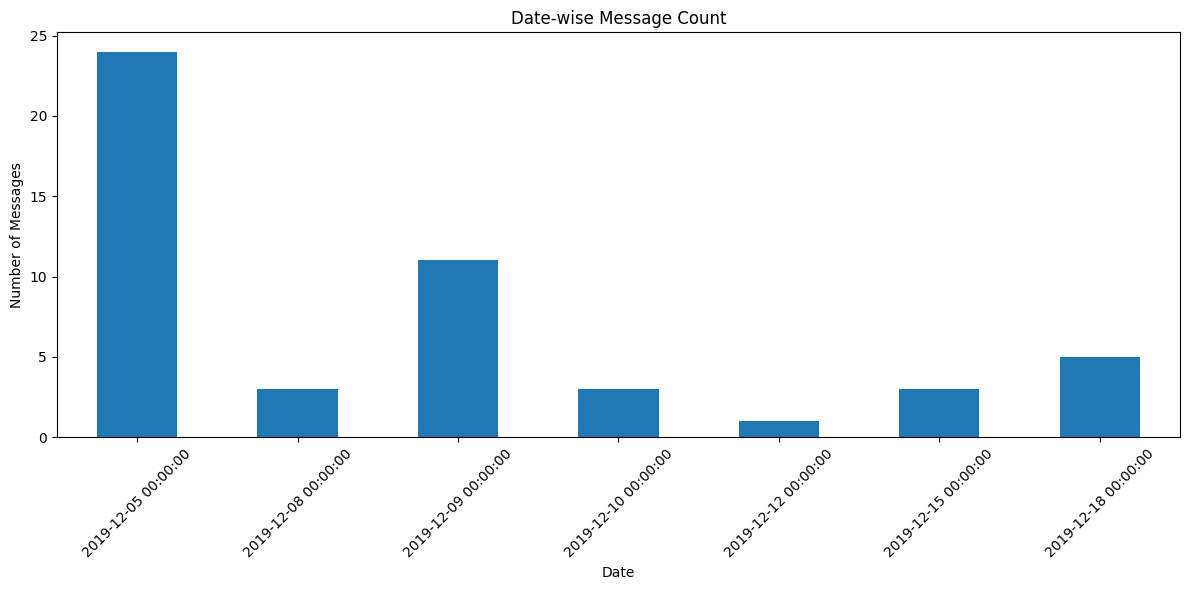

In [39]:
import matplotlib.pyplot as plt

# Group by 'Date' and count the number of messages for each date
datewise_counts = dataset.groupby('Date').size()

# Plotting the bar chart
plt.figure(figsize=(12, 6))
datewise_counts.plot(kind='bar')
plt.title('Date-wise Message Count')
plt.xlabel('Date')
plt.ylabel('Number of Messages')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
dataset

,Date,Time,Name,Chat,Scores,Compound,Positive,Negative,Neutral,comp_score,Flirtatious,DayOfWeek,Hour
0,2019-12-05,13:42:00,Mabel Infoziant,Hi this is Mabel we just spoke,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos,False,Thursday,13
1,2019-12-05,13:42:00,Mabel Infoziant,What’s your full name,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos,False,Thursday,13
2,2019-12-05,13:42:00,AR❤,Ramisha Rani K,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos,False,Thursday,13
3,2019-12-05,13:42:00,Mabel Infoziant,Ok,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.2960,1.000,0.000,0.000,pos,False,Thursday,13
4,2019-12-05,13:42:00,Mabel Infoziant,ramisharanik@gmail.com,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos,False,Thursday,13
5,2019-12-05,13:43:00,Mabel Infoziant,Your email Id?,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos,False,Thursday,13
6,2019-12-05,13:43:00,AR❤,Yes Mam,"{'neg': 0.0, 'neu': 0.27, 'pos': 0.73, 'compou...",0.4019,0.730,0.000,0.270,pos,False,Thursday,13
7,2019-12-05,13:43:00,Mabel Infoziant,I will send 2 abstracts for u to start working,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos,False,Thursday,13
8,2019-12-05,13:43:00,AR❤,Yeah mam,"{'neg': 0.0, 'neu': 0.312, 'pos': 0.688, 'comp...",0.2960,0.688,0.000,0.312,pos,False,Thursday,13
9,2019-12-05,13:43:00,Mabel Infoziant,Give me the list that u have too,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos,False,Thursday,13


# Sentimental Analysis

<Figure size 1200x600 with 0 Axes>

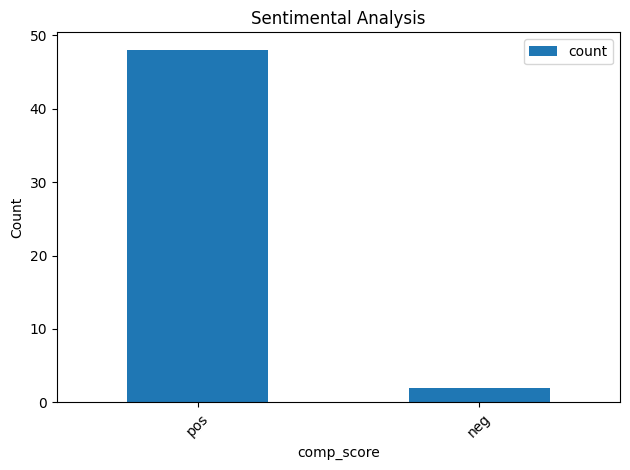

In [42]:

# Plotting the bar chart
plt.figure(figsize=(12, 6))
posneg_count.plot(kind='bar')
plt.title('Sentimental Analysis')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()